# Основы работы с количественными данными

*Алла Тамбовцева*

## Практикум 5-6. Доверительные интервалы и проверка гипотез о средних и долях

Импортируем необходимые для работы библиотеки и модули:
    
* библиотека `pandas` для загрузки и обработки данных;
* модуль `stats` из библиотеки `scipy` (от *Scientific Python*) для построения доверительных интервалов и реализации статистических критериев.

In [1]:
import pandas as pd
from scipy import stats

Загрузим данные из файла `sentiment.csv` (доработанный файл с [Kaggle](https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset?select=sentimentdataset.csv)) и выведем на экран первые 10 строк датафрейма:

In [2]:
dat = pd.read_csv("sentiment.csv")
dat.head(10)

,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
2,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
3,5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9
4,6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14
5,7,The new movie release is a must-watch! ...,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16,19
6,10,Just published a new blog post. Check it out!...,Positive,2023-01-17 15:15:00,BloggerX,Instagram,#Blogging #NewPost,22.0,45.0,USA,2023,1,17,15
7,12,Exploring the city's hidden gems. ...,Positive,2023-01-18 14:50:00,UrbanExplorer,Facebook,#CityExplore #HiddenGems,12.0,25.0,UK,2023,1,18,14
8,13,"New year, new fitness goals! 💪 ...",Positive,2023-01-18 18:00:00,FitJourney,Instagram,#NewYear #FitnessGoals,28.0,55.0,USA,2023,1,18,18
9,15,Reflecting on the past and looking ahead. ...,Positive,2023-01-19 13:20:00,Reflections,Facebook,#Reflection #Future,20.0,40.0,USA,2023,1,19,13


Показатели в файле:

* `Text`: текст поста;
* `Sentiment`: эмоциональная окраска поста (значения `Positive` и `Negative`);
* `Timestamp`: время публикации поста;
* `User`: имя пользователя;
* `Platform`: платформа (значения `Facebook`, `Instagram`, `Twitter`*);
* `Hashtags`: хэштеги;
* `Retweets`: число репостов;
* `Likes`: число лайков;
* `Country`: страна пользователя;
* `Year`: год публикации поста;
* `Month`: месяц публикации поста;
* `Day`: день публикации поста;
* `Hour`: час публикации поста.

*все три платформы запрещены в РФ.

## Часть 1: знакомство с данными

### Задание 1

Выведите описательные статистики для всех числовых столбцов в `dat`. Выведите описательные статистики для всех текстовых столбцов в `dat`. Проинтерпретируйте полученные результаты для столбцов `Likes`, `Platform`, `Sentiment`.

In [3]:
dat.describe()

,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,376.803077,21.492308,42.815385,2021.320000,5.778462,16.203077,15.430769
std,247.515228,6.833837,13.623115,2.494884,3.572896,8.716133,3.941584
min,0.000000,5.000000,10.000000,2012.000000,1.000000,1.000000,0.000000
25%,102.000000,18.000000,35.000000,2020.000000,2.000000,10.000000,13.000000
50%,399.000000,22.000000,42.000000,2023.000000,6.000000,16.000000,16.000000
75%,622.000000,25.000000,50.000000,2023.000000,9.000000,23.000000,19.000000
max,731.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [4]:
dat.describe(include = "object")

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Country
count,325,325,325,325,325,325,325
unique,315,2,314,311,3,311,65
top,"A playful escapade in the carnival of life, c...",Positive,2018-08-22 17:20:00,CarnivalDreamer,Twitter,#Playful #CarnivalEscapade,USA
freq,3,229,3,3,111,3,38


### Задание 2

Выберите из датафрейма `dat` строки, которые соответствуют постам, опубликованным в Instagram (запрещён в РФ) и сохраните их в датафрейм `dat_inst`.

In [5]:
dat_inst = dat[dat["Platform"] == "Instagram"]

### Задание 3

Используя данные из датафрейма `dat_inst`, сгруппируйте посты по их эмоциональной окраске (Positive/Negative) и выведите для каждой группы описательные статистики для числа лайков. Проинтерпретируйте полученные результаты – обратите особое внимание на средние и стандартные отклонения.

In [6]:
dat_inst.groupby("Sentiment")["Likes"].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
Negative,31.0,35.709677,14.706447,15.0,25.0,35.0,45.0,70.0
Positive,77.0,49.220779,14.121301,25.0,38.0,45.0,60.0,80.0


### Задание 4

Выберите из датафрейма `dat_inst` строки, соответствующие положительно окрашенным постам, и сохраните их в датафрейм `pos`. Выберите из датафрейма `dat_inst` строки, соответствующие отрицательно окрашенным постам, и сохраните их в датафрейм `neg`.

In [7]:
pos = dat_inst[dat_inst["Sentiment"] == "Positive"]
neg = dat_inst[dat_inst["Sentiment"] == "Negative"]

## Часть 2: работа со средними

### Задание 1

Вычислите среднее число лайков у положительно окрашенных постов в `pos`, сохраните его в переменную `pos_average`. Вычислите на основе этой выборки стандартную ошибку среднего и сохраните в переменную `se_pos`. Определите объём выборки и сохраните его в переменную `pos_n`. 

Постройте 95%-ный доверительный интервал для среднего числа лайков положительно окрашенных постов. Проинтерпретируйте полученный интервал.

**Подсказка:** функция `t.interval()` из модуля `stats`; на первом месте указывается уровень доверия (в виде вероятности), на втором в аргументе `loc` – среднее, на третьем в аргументе `scale` – стандартная ошибка среднего.

In [8]:
# среднее

pos_average = pos["Likes"].mean()

# стандартная ошибка
# готовая функция sem() из stats,
# от standard error of a mean

se_pos = stats.sem(pos["Likes"])

# объем выборки

pos_n = pos["Likes"].size

In [9]:
# доверительный интервал
# обратите внимание на df

stats.t.interval(0.95, loc = pos_average, scale = se_pos, df = pos_n - 1)

(46.015637052986044, 52.4259213885724)

>**Примечание.** Помимо указанных в условии аргументов для вычисления границ доверительного интервала для среднего через `t.interval()` необходимо зафиксировать значение `df`, которое всегда в таком случае равно $n-1$. Значение, на которое домножается стандартная ошибка среднего при построении интервала, извлекается из распределения Стьюдента, оно же t-распределение (отсюда и функция `t.interval()`) с параметром *число степеней свободы* $\text{df}$ (от *degrees of freedom)*. Без числа степеней свободы задать распределение Стьюдента невозможно, распределений Стьюдента вообще бесконечно много, а с фиксированным числом степеней свободы оно одно.

>**Интерпретация.** С 95% уверенностью можно заключить, что истинное среднее значение числа лайков у положительно окрашенных постов лежит в интервале от 46 до 52. Истинное среднее значение – значение для всей генеральной совокупности, то есть для всех положительно окрашенных постов, а не только для тех, которые представлены в наших данных (про них мы и так все точно знаем на 100%, видели описательные статистики в виде конкретных чисел). 

### Задание 2

Вычислите среднее число лайков у отрицательно окрашенных постов в `neg`, сохраните его в переменную `neg_average`. Вычислите на основе этой выборки стандартную ошибку среднего и сохраните в переменную `se_neg`. Определите объём выборки и сохраните его в переменную `neg_n`. 

Постройте 95%-ный доверительный интервал для среднего числа лайков отрицательно окрашенных постов. Проинтерпретируйте полученный интервал.

In [10]:
neg_average = neg["Likes"].mean()
se_neg = stats.sem(neg["Likes"])
neg_n = neg["Likes"].size

stats.t.interval(0.95, loc = neg_average, scale = se_neg, df = neg_n - 1)

(30.315309277038022, 41.104045561671654)

>**Интерпретация.** С 95% уверенностью можно заключить, что истинное среднее значение числа лайков у отрицательно окрашенных постов лежит в интервале от 30 до 41. 

>**Полезное замечание.** Если мы, приняв уровень доверия 95%, зададимся вопросом, можно ли считать среднее число лайков у положительно и отрицательно окрашенных постов одинаковым, ответ будет отрицательным, так как 95%-ные доверительные интервалы не пересекаются (интервал от 30 до 41 и интервал от 46 до 52). Если бы интервалы пересекались, однозначного ответа дать бы мы не смогли, все зависит от того, насколько велико пересечение, поэтому пришлось бы прибегнуть к более строгому способу проверки - проверки гипотезы о равенстве средних с помощью критерия Стьюдента (см. задание 4). 

>**Дополнение.** При этом, если мы проверяем справедливость утверждений по одному доверительному интервалу, для одного среднего или для одной доли, там все однозначно. Если интересующее нас значение входит в доверительный интервал, то есть, если интервал его «накрывает», то на выбранном уровне доверия истинное значение параметра может быть равно этому значению, если нет – то не может.

### Задание 3

Постройте 90%-ный и 99%-ный доверительный интервал для среднего числа лайков отрицательно окрашенных постов. Прокомментируйте полученные результаты.

In [11]:
print(stats.t.interval(0.90, loc = neg_average, scale = se_neg, df = neg_n - 1))
print(stats.t.interval(0.99, loc = neg_average, scale = se_neg, df = neg_n - 1))

(31.22660755788938, 40.1927472808203)
(28.445960524314074, 42.973394314395605)


>Интерпретация аналогична интерпретации выше, только с другим уровнем доверия. Заметим, что 90%-ный интервал самый короткий (от 31 до 40), а 99%-ный интервал – самый длинный (от 28 до 42). При увеличении уровня доверия точность снижается, поэтому мы получаем более «размытые» границы интервала. Формально это происходит потому, что при увеличении уровня доверия t-значение, на которое домножается стандартная ошибка среднего, увеличивается. 

### Задание 4

Реализуйте критерий Стьюдента для двух выборок для сравнения среднего числа лайков положительно и отрицательно окрашенных постов.  Сформулируйте нулевую и альтернативную гипотезу. Проинтерпретируйте полученные результаты, приняв уровень доверия равным 0.95. 

Подсказка: функция `ttest_ind()` из модуля `stats`, на первое место в этой функции ставится первая выборка (список/массив/столбец датафрейма), на второе – вторая выборка.

In [12]:
stats.ttest_ind(pos["Likes"], neg["Likes"])

Ttest_indResult(statistic=4.44521674351864, pvalue=2.168633987539358e-05)

> **Гипотезы:** $H_0: \mu_1 = \mu_2$ (средние двух генеральных совокупностей равны) и $H_1: \mu_1 \ne \mu_2$ (средние двух генеральных совокупностей не равны). 

> **Интерпретация:** наблюдаемое значение статистики критерия (`statistic`) равное 4.445 превышает критическое значение статистики для уровня доверия 0.95, которое примерно равно 2, значит, нулевая гипотеза о равенстве средних отвергается, среднее число лайков для положительно окрашенных постов отличается от среднего числа лайков отрицательно окрашеных постов. Значение p-value примерно 0 ($2.16 \times 10^{-5}$), поэтому данные не свидетельствуют о жизнеспособности нулевой гипотезы. Формально мы должны сравнить p-value с уровнем значимости $\alpha$, раз уровень доверия 0.95, то уровень значимости 0.05, 0 < 0.05, следовательно, гипотеза отвергается.

## Часть 3: работа с долями

### Задание 1

Используя данные из датафрейма `dat_inst`, выведите таблицу частот для эмоциональной окраски поста (`Sentiment`). Постройте на её основе столбиковую диаграмму.

In [13]:
tab = dat_inst["Sentiment"].value_counts()
tab

Positive    77
Negative    31
Name: Sentiment, dtype: int64

In [14]:
# разбираем таблицу частот на части для диаграммы
# index – названия категорий
# values – частоты

cats = tab.index
vals = tab.values
print(cats)
print(vals)

Index(['Positive', 'Negative'], dtype='object')
[77 31]


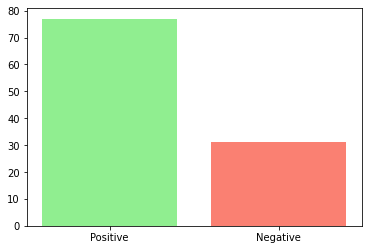

In [15]:
from matplotlib import pyplot as plt

plt.bar(cats, vals, color = ["lightgreen", "salmon"]);

### Задание 2

Вычислите долю положительно окрашенных постов в `dat_inst` и сохраните ее в переменную `p`. Вычислите долю отрицательно окрашенных постов и сохраните ее в переменную `q`. Определите объём выборки и сохраните его в переменную `n`. На основе имеющихся данных вычислите стандартную ошибку доли.

Постройте 95%-ный доверительный интервал для доли положительно окрашенных постов. Проинтерпретируйте полученный интервал.

**Подсказка:** функция `norm.interval()` из модуля `stats`; на первом месте указывается уровень доверия (в виде вероятности), на втором в аргументе `loc` – доля, на третьем в аргументе `scale` – стандартная ошибка доли.

In [16]:
# вернемся к таблице частот
print(tab)

Positive    77
Negative    31
Name: Sentiment, dtype: int64


In [17]:
# зафиксируем объем выборки – это сумма частот в tab
n = tab.sum()
print(n)

108


In [18]:
# найдем долю Positive и обратную к ней
p = 77 / n
q = 1 - p
print(p, q)

0.7129629629629629 0.2870370370370371


In [19]:
# найдем стандартную ошибку – готовой функции нет,
# используем формулу
# вместо sqrt() возводим в степень 0.5,
# степень 1/2 – это и есть квадратный корень

se = (p * (1 - p) / n) ** 0.5
print(se)

0.04353019135399183


In [20]:
# строим интервал
stats.norm.interval(0.95, loc = p, scale = se)

(0.627645355669002, 0.7982805702569238)

>**Интерпретация.** С 95% уверенностью можем заключить, что истинное значение доли положительно окрашенных постов в Инстаграме лежит в интервале от 0.62 до 0.79. Интервал получился не очень узким, что ожидаемо, объем выборки здесь 77, больше 30, но все-таки маловат.